# Foundations of Data Science

## Homework outline
This homework consists of three question, each aimed at one skill you are supposed to learn and get comfortable with during the course.

In *Question 1*, you are supposed to perform an observational study based on *propensity score matching*, as you learned during the course.

*Question 2*, briefly introduces you to the usage of sklearn library as well as the very basics of word vectorization.

For *Question 3*, you should get familiarized with the basics of PyTorch, which is going to be of so much use during the project.

## Question 1: Propensity score matching

In this exercise, you will apply propensity score matching that was discussed the lecture ("Observational studies"), in order to draw conclusions from an observational study. [(a reference that could help if you are interested in the concept)](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), 

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](https://www.jstor.org/stable/1806062)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.



### 1-1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups using plots, such as histograms, and other statistical measures, such as mean, median, variance, and standard deviation.

To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn import linear_model
import networkx as nx

In [2]:
lalonde_data = pd.read_csv('lalonde.csv')

In [3]:
lalonde_data.head(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700


In [4]:
treat = lalonde_data['treat']
re78 = lalonde_data['re78']
# seperating the two groups
re78_treated = re78[lalonde_data.treat==1]
re78_nontreated = re78[lalonde_data.treat==0]

In [5]:
print('Number of people in treated group: ', len(re78_treated))
print('Number of people in nnon-treated group: ', len(re78_nontreated))

Number of people in treated group:  185
Number of people in nnon-treated group:  429


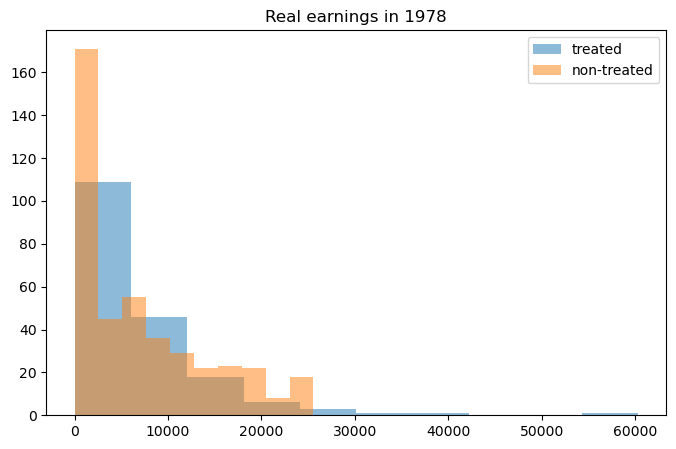

In [6]:
# plotting histograms
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(re78_treated, alpha=0.5)
ax.hist(re78_nontreated, alpha=0.5)
plt.legend(['treated', 'non-treated'],loc='upper right')
plt.title('Real earnings in 1978')
plt.show()

In [7]:
# calculating statistical measures
# mean
mean_treated = np.mean(re78_treated)
mean_nontreated = np.mean(re78_nontreated)
print('Mean of real earnings in 1978 for treated group: ', round(mean_treated, 4))
print('Mean of real earnings in 1978 for non-treated group: ', round(mean_nontreated, 4))
# median
median_treated = np.median(re78_treated)
median_nontreated = np.median(re78_nontreated)
print('Median of real earnings in 1978 for treated group: ', round(median_treated, 4))
print('Median of real earnings in 1978 for non-treated group: ', round(median_nontreated, 4))
# variance
var_treated = np.var(re78_treated)
var_nontreated = np.var(re78_nontreated)
print('Variance of real earnings in 1978 for treated group: ', round(var_treated, 4))
print('Variance of real earnings in 1978 for non-treated group: ', round(var_nontreated, 4))
# standard deviation
var_re78_treated = statistics.stdev(re78_treated)
var_re78_nontreated = statistics.stdev(re78_nontreated)
print('Standard deviation of real earnings in 1978 for treated group: ', round(var_re78_treated, 4))
print('Standard deviation of real earnings in 1978 for non-treated group: ', round(var_re78_nontreated, 4))

Mean of real earnings in 1978 for treated group:  6349.1435
Mean of real earnings in 1978 for non-treated group:  6984.1697
Median of real earnings in 1978 for treated group:  4232.309
Median of real earnings in 1978 for non-treated group:  4975.505
Variance of real earnings in 1978 for treated group:  61561444.5872
Variance of real earnings in 1978 for non-treated group:  53080775.7273
Standard deviation of real earnings in 1978 for treated group:  7867.4022
Standard deviation of real earnings in 1978 for non-treated group:  7294.1618


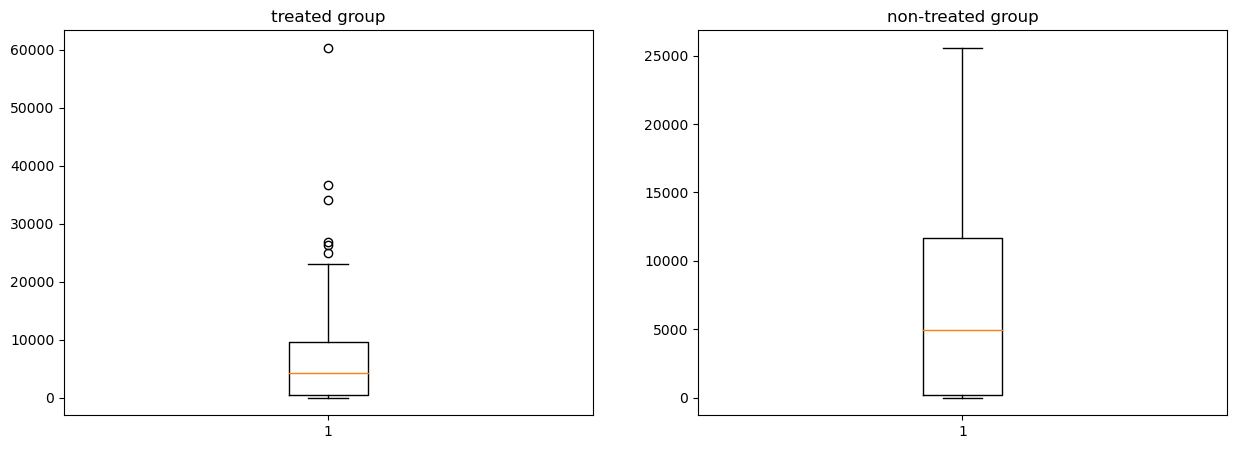

In [8]:
# plotting the box plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].boxplot(re78_treated)
ax[0].set_title('treated group')
ax[1].boxplot(re78_nontreated)
ax[1].set_title('non-treated group')
plt.show()

As we can see from the above results, not only the treated people do not have more income compared to non-treated group, but also it can be said that treated people have less income. Therefore, we can conclude that the training program does not have positive influence on the income of people.

### 1-2. A closer look at the data

You're not naive, of course, so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.


In [9]:
age = lalonde_data['age']
educ = lalonde_data['educ']
black = lalonde_data['black']
hispan = lalonde_data['hispan']
married = lalonde_data['married']
nodegree = lalonde_data['nodegree']
re74 = lalonde_data['re74']
re75 = lalonde_data['re75']
# seperating the groups
age_treated = age[lalonde_data['treat']==1]
age_nontreated = age[lalonde_data['treat']==0]

educ_treated = educ[lalonde_data['treat']==1]
educ_nontreated = educ[lalonde_data['treat']==0]

black_treated = black[lalonde_data['treat']==1]
black_nontreated = black[lalonde_data['treat']==0]

hispan_treated = hispan[lalonde_data['treat']==1]
hispan_nontreated = hispan[lalonde_data['treat']==0]

married_treated = married[lalonde_data['treat']==1]
married_nontreated = married[lalonde_data['treat']==0]

nodegree_treated = nodegree[lalonde_data['treat']==1]
nodegree_nontreated = nodegree[lalonde_data['treat']==0]

re74_treated = re74[lalonde_data['treat']==1]
re74_nontreated = re74[lalonde_data['treat']==0]

re75_treated = re75[lalonde_data['treat']==1]
re75_nontreated = re75[lalonde_data['treat']==0]

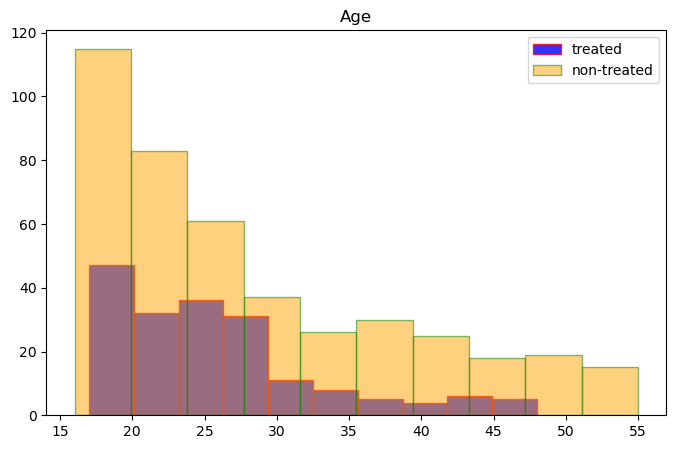

In [10]:
# plotting histograms for age feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(age_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(age_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Age')
plt.show()

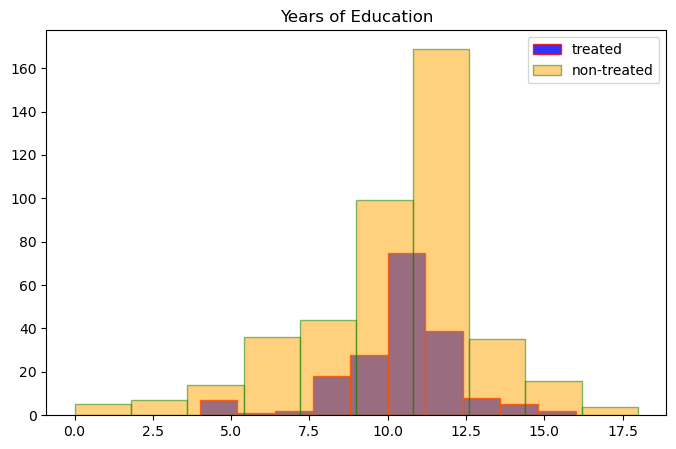

In [11]:
# plotting histograms for education feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(educ_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(educ_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Years of Education')
plt.show()

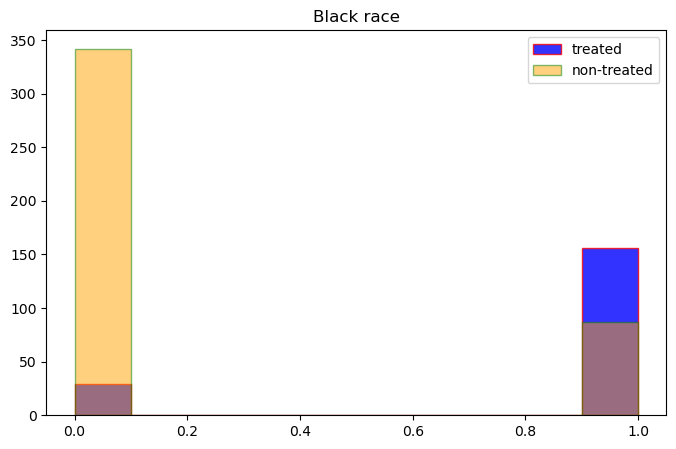

In [12]:
# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(black_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(black_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Black race')
plt.show()

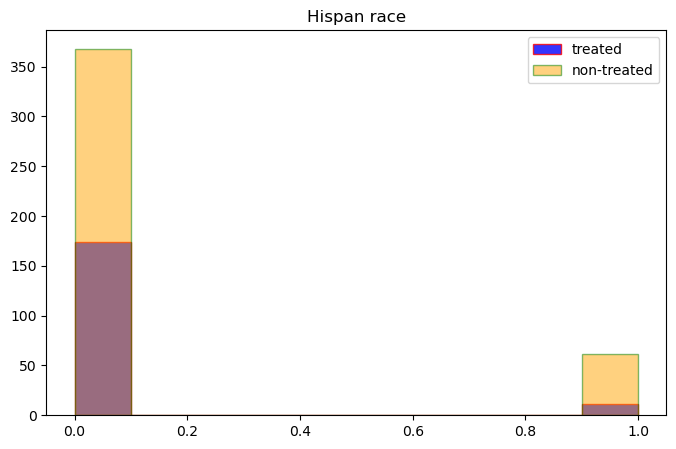

In [13]:
# plotting histograms for hispan feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(hispan_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(hispan_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Hispan race')
plt.show()

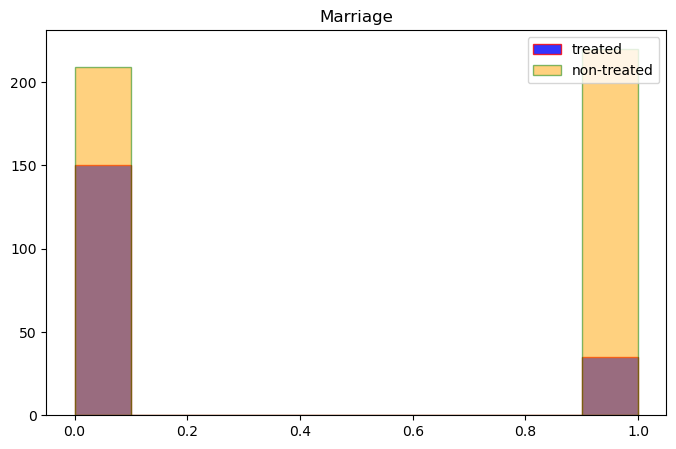

In [14]:
# plotting histograms for marriage feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(married_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(married_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Marriage')
plt.show()

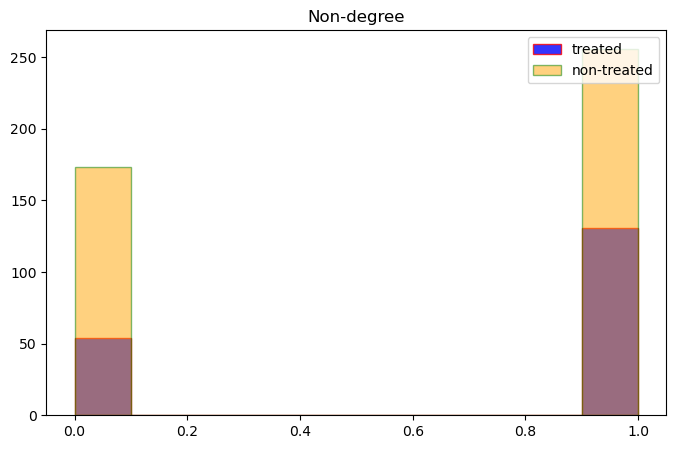

In [15]:
# plotting histograms for nondegree feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(nodegree_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(nodegree_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Non-degree')
plt.show()

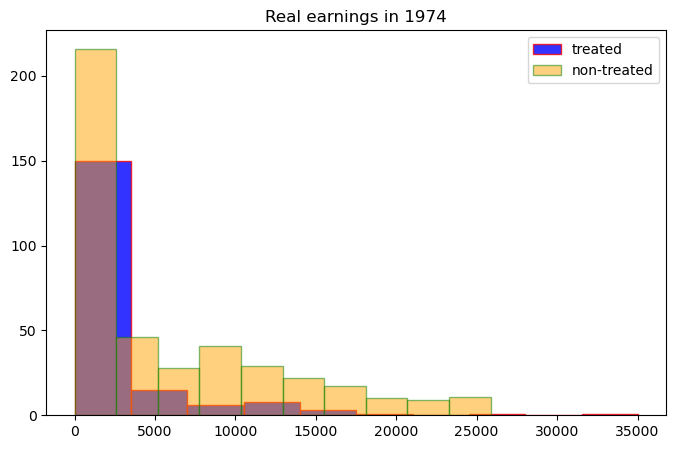

In [16]:
# plotting histograms for re74 feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(re74_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(re74_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Real earnings in 1974')
plt.show()

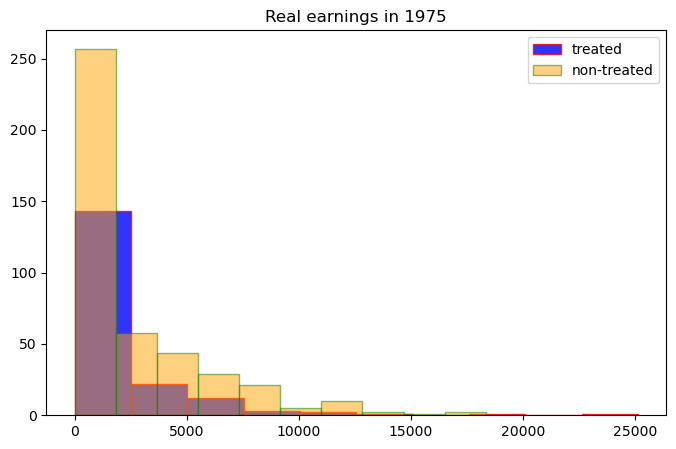

In [17]:
# plotting histograms for re75 feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(re75_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(re75_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Real earnings in 1975')
plt.show()

From the above figures, we can see that the features are not equally distributed among treated and non-treated groups and this may affect the result.

### 1-3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the **propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).**
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum.

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.)


In [18]:
features = np.array([age, educ, black, hispan, married, nodegree, re74, re75])
features = np.transpose(features)
labels = treat

In [19]:
logistic = linear_model.LogisticRegression(max_iter=200)
# training the model
logistic.fit(features, labels)
print('Accuracy of the logistic regression model on the whole dataset: ', round(logistic.score(features, labels), 4))
# estimating propensity scores for all points in the dataset
class_probabilities = logistic.predict_proba(features)
# probability of receving the treatment (being labeled 1)
propensity_scores = class_probabilities[:,1]  
print('propensity scores for the first 10 samples: \n',propensity_scores[0:10])

Accuracy of the logistic regression model on the whole dataset:  0.8046
propensity scores for the first 10 samples: 
 [0.43193237 0.13496758 0.71975344 0.65895318 0.69567631 0.69769523
 0.72992989 0.65071514 0.67239245 0.0792408 ]


### 1-4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

#### ** Bonus: Also, You can derive a mathematical model for this section. Your optimization problem should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

You don't need to implement this model and only need to write an optimization problem and proof theoretically that your model satisfies our goal.

In [118]:
# creating a graph with nodes being the IDs
graph = nx.Graph()

IDs = lalonde_data['id']
IDs_treated = list(IDs[lalonde_data.treat==1])
treated_idx = lalonde_data.index[lalonde_data['treat'] == 1].tolist()
IDs_nontreated = list(IDs[lalonde_data.treat==0])
nontreated_idx = lalonde_data.index[lalonde_data['treat'] == 0].tolist()

# adding IDs as nodes
graph.add_nodes_from(IDs)

# adding edges and their weights
for i in range(len(IDs_treated)):
    for j in range(len(IDs_nontreated)):
        score_diff = np.abs( propensity_scores[treated_idx[i]] - propensity_scores[nontreated_idx[i]] ) # we want to minimize sum of these terms
        graph.add_edge(IDs_treated[i], IDs_nontreated[j], weight=score_diff)

In [119]:
# we should find the minimum weight matching graph
graph_after_matching = sorted(nx.min_weight_matching(graph))
print('Number of edges of the matching graph: ', len(graph_after_matching))

Number of edges of the matching graph:  185


In [120]:
# "graph_after_matching" contains the list of tuple of mathced nodes
graph_after_matching[0:5]

[('NSW1', 'PSID371'),
 ('NSW10', 'PSID415'),
 ('NSW100', 'PSID416'),
 ('NSW101', 'PSID305'),
 ('NSW102', 'PSID352')]

Now, we should consider elements of the `graph_after_matching` as the new treated and nontreated groups. Then a new dataframe containing only these mathced IDs will be created.

In [121]:
new_ID_treated = [pair[0] for pair in graph_after_matching]
new_ID_nontreated = [pair[1] for pair in graph_after_matching]
new_ID = new_ID_treated + new_ID_nontreated # ids which should be selected from the dataframe
# creating the new dataframe
new_lalonde_data = lalonde_data.loc[lalonde_data['id'].isin(new_ID)]
new_lalonde_data = new_lalonde_data.reset_index()
new_lalonde_data.head(5)

,index,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


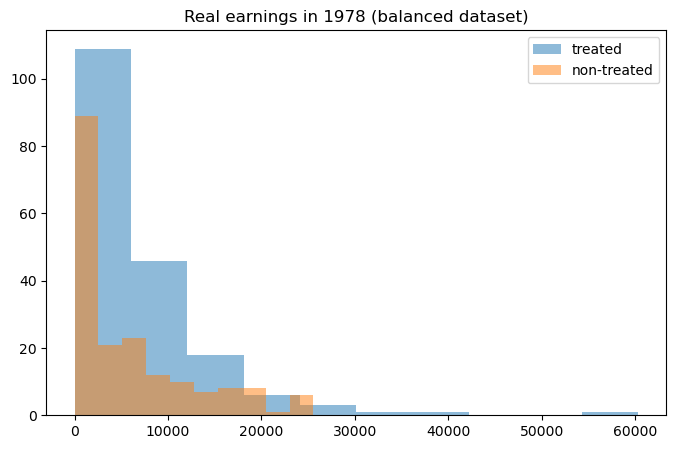

In [122]:
NEWtreat = new_lalonde_data['treat']
NEWre78 = new_lalonde_data['re78']
# seperating the two groups
NEWre78_treated = NEWre78[new_lalonde_data.treat==1]
NEWre78_nontreated = NEWre78[new_lalonde_data.treat==0]
# plotting histograms for re78
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWre78_treated, alpha=0.5)
ax.hist(NEWre78_nontreated, alpha=0.5)
plt.legend(['treated', 'non-treated'],loc='upper right')
plt.title('Real earnings in 1978 (balanced dataset)')
plt.show()

Now we can see that the treated group has more income than the non-treated group which shows the perfect efficiency of the training program.

In [123]:
NEWage = new_lalonde_data['age']
NEWeduc = new_lalonde_data['educ']
NEWblack = new_lalonde_data['black']
NEWhispan = new_lalonde_data['hispan']
NEWmarried = new_lalonde_data['married']
NEWnodegree = new_lalonde_data['nodegree']
NEWre74 = new_lalonde_data['re74']
NEWre75 = new_lalonde_data['re75']
# seperating the groups
NEWage_treated = NEWage[new_lalonde_data['treat']==1]
NEWage_nontreated = NEWage[new_lalonde_data['treat']==0]

NEWeduc_treated = NEWeduc[new_lalonde_data['treat']==1]
NEWeduc_nontreated = NEWeduc[new_lalonde_data['treat']==0]

NEWblack_treated = NEWblack[new_lalonde_data['treat']==1]
NEWblack_nontreated = NEWblack[new_lalonde_data['treat']==0]

NEWhispan_treated = NEWhispan[new_lalonde_data['treat']==1]
NEWhispan_nontreated = NEWhispan[new_lalonde_data['treat']==0]

NEWmarried_treated = NEWmarried[new_lalonde_data['treat']==1]
NEWmarried_nontreated = NEWmarried[new_lalonde_data['treat']==0]

NEWnodegree_treated = NEWnodegree[new_lalonde_data['treat']==1]
NEWnodegree_nontreated = NEWnodegree[new_lalonde_data['treat']==0]

NEWre74_treated = NEWre74[new_lalonde_data['treat']==1]
NEWre74_nontreated = NEWre74[new_lalonde_data['treat']==0]

NEWre75_treated = NEWre75[new_lalonde_data['treat']==1]
NEWre75_nontreated = NEWre75[new_lalonde_data['treat']==0]

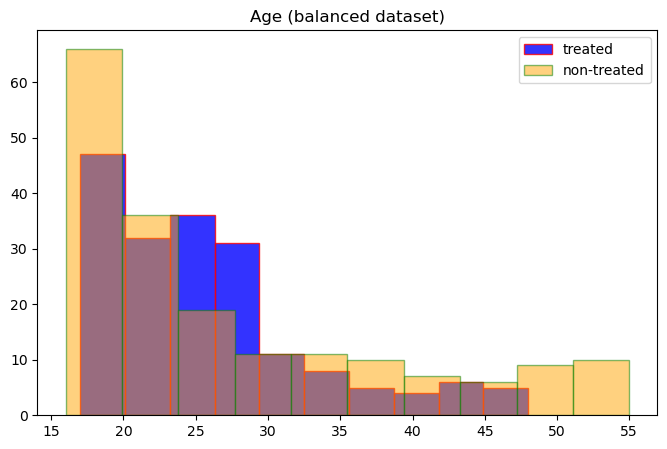

In [124]:
# plotting histograms for age feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWage_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWage_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Age (balanced dataset)')
plt.show()

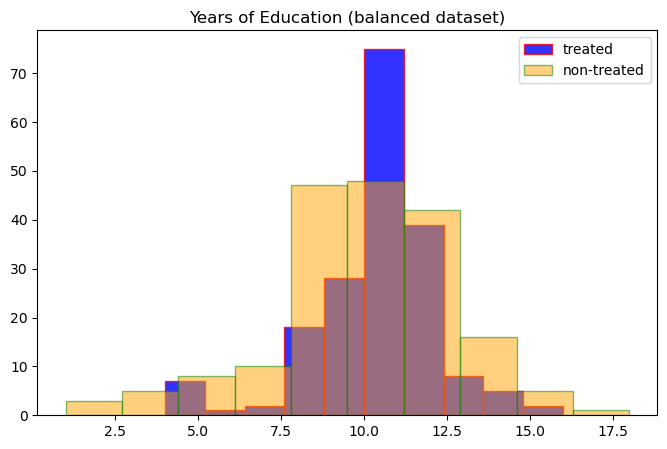

In [125]:
# plotting histograms for education feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWeduc_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWeduc_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Years of Education (balanced dataset)')
plt.show()

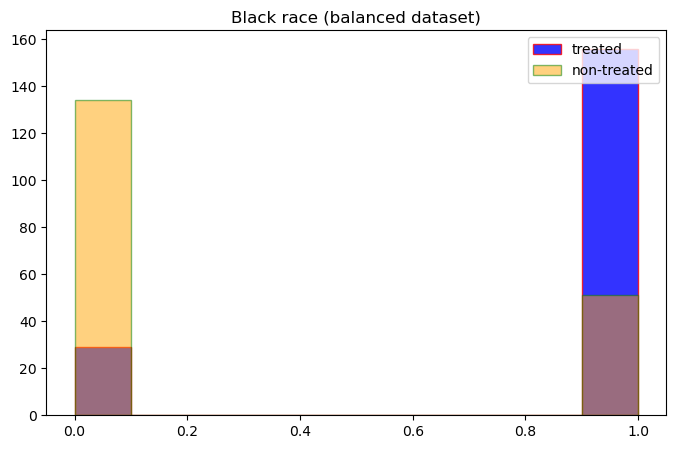

In [126]:
# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWblack_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWblack_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Black race (balanced dataset)')
plt.show()

We can see that this feature (being black) is not still well distributed among the treated and non-treated groups.

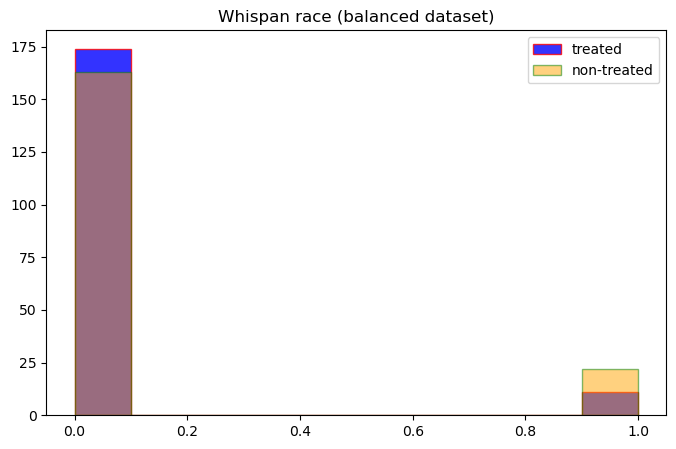

In [129]:
# plotting histograms for whispan race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWhispan_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWhispan_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Whispan race (balanced dataset)')
plt.show()

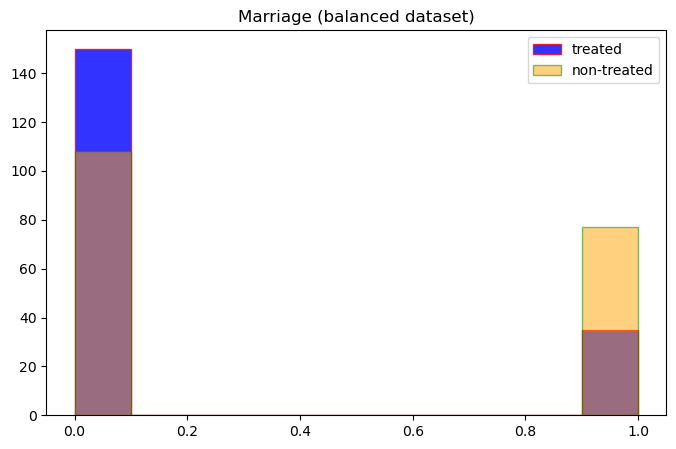

In [130]:
# plotting histograms for the married feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWmarried_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWmarried_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Marriage (balanced dataset)')
plt.show()

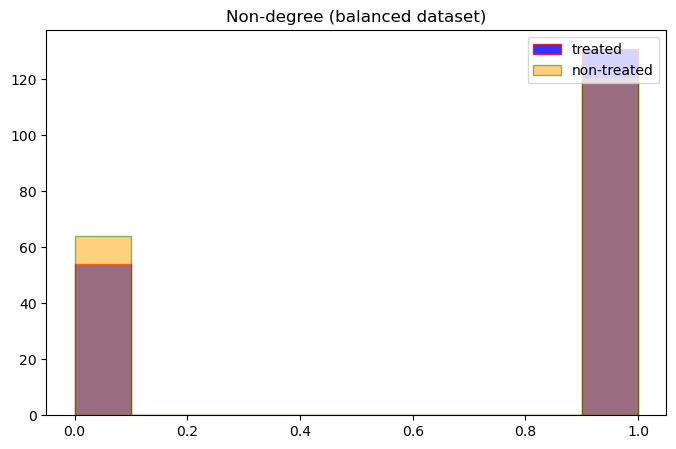

In [131]:
# plotting histograms for the non-degree feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWnodegree_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWnodegree_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Non-degree (balanced dataset)')
plt.show()

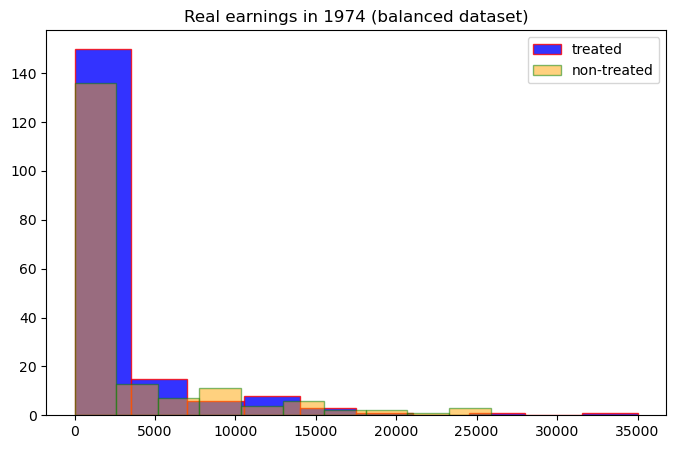

In [132]:
# plotting histograms for re74 feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWre74_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWre74_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Real earnings in 1974 (balanced dataset)')
plt.show()

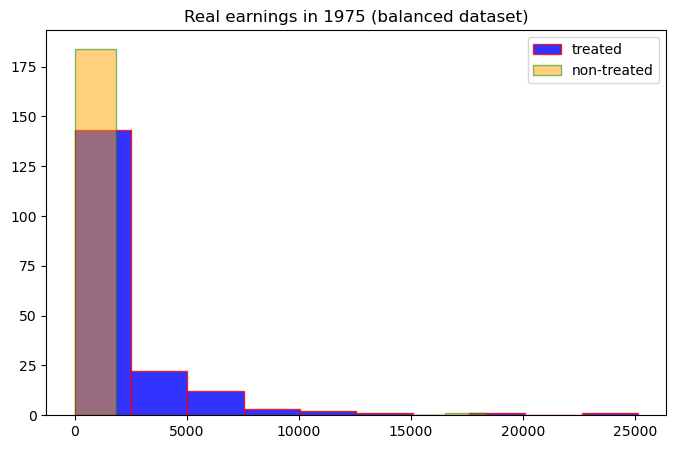

In [133]:
# plotting histograms for re75 feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWre75_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWre75_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Real earnings in 1975 (balanced dataset)')
plt.show()

We can see that for the balanced dataset, the distribution of most of the features are more similar compared to the unbalanced dataset. Therefore, our conclusion, which is the efficieny of the training program on the real earning in 1978, is now more valid.

### 1-5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.



**Answer:** From the results of the previous part, we can see that for the **black race** feature, its distribution is not still similar in treated and non-treated groups. Therefore, the result we obtained in the last part is not sufficiently valid. 

In the following part, we create a graph with IDs being the nodes and the score differences being the weights, but this time, we match only subjects that have the same value for the problematic feature.

In [141]:
# creating a graph with nodes being the IDs
NEWgraph = nx.Graph()

IDs = lalonde_data['id']
IDs_treated = list(IDs[lalonde_data.treat==1])
treated_idx = lalonde_data.index[lalonde_data['treat'] == 1].tolist()
IDs_nontreated = list(IDs[lalonde_data.treat==0])
nontreated_idx = lalonde_data.index[lalonde_data['treat'] == 0].tolist()

# adding IDs as nodes
NEWgraph.add_nodes_from(IDs)

# adding edges and their weights
for i in range(len(IDs_treated)):
    for j in range(len(IDs_nontreated)):
        if ( black[treated_idx[i]] == black[nontreated_idx[j]] ) & ( married[treated_idx[i]] == married[nontreated_idx[j]] ): 
            score_diff = np.abs( propensity_scores[treated_idx[i]] - propensity_scores[nontreated_idx[i]] ) # we want to minimize sum of these terms
            NEWgraph.add_edge(IDs_treated[i], IDs_nontreated[j], weight=score_diff)

In [142]:
# we should find the minimum weight matching graph
NEWgraph_after_matching = sorted(nx.min_weight_matching(NEWgraph))
print('Number of edges of the new matching graph: ', len(NEWgraph_after_matching))

Number of edges of the new matching graph:  116


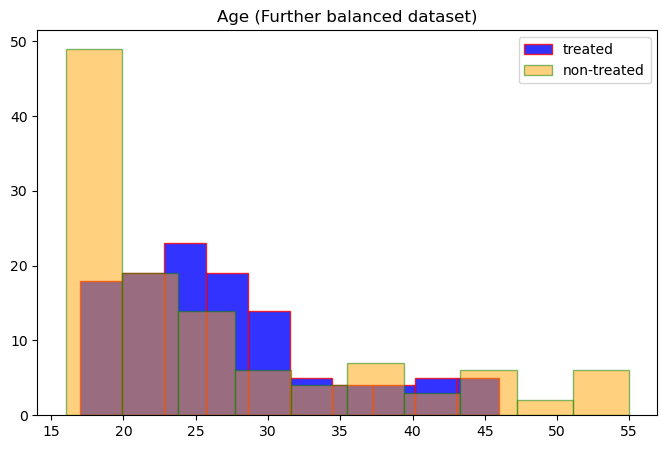

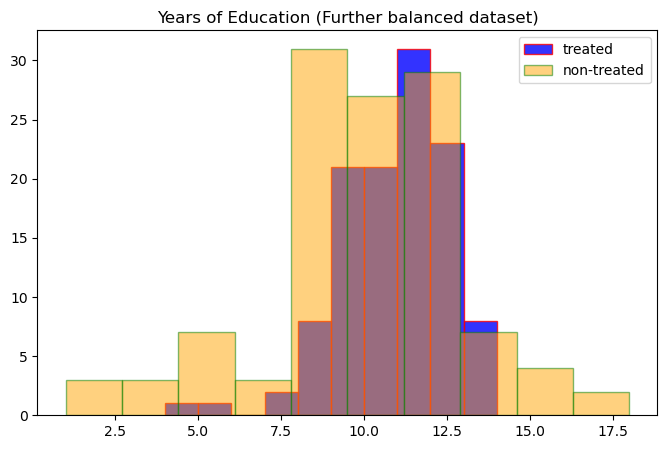

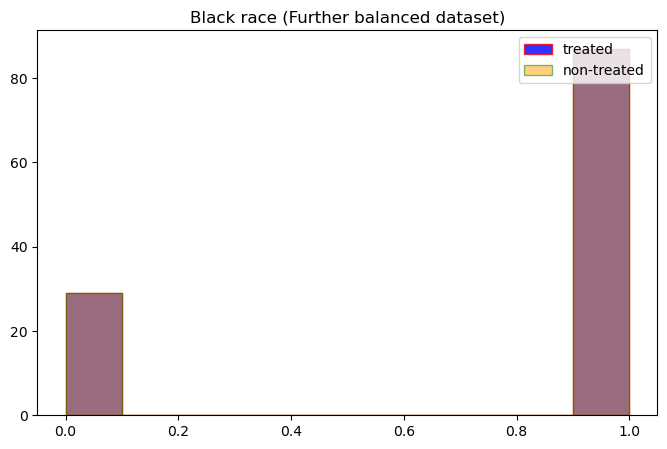

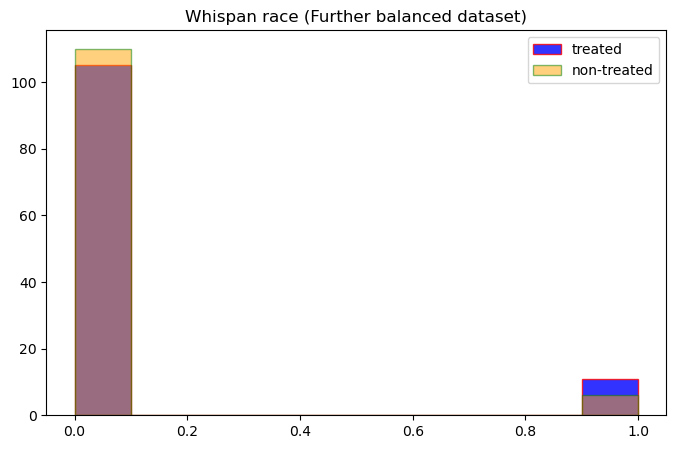

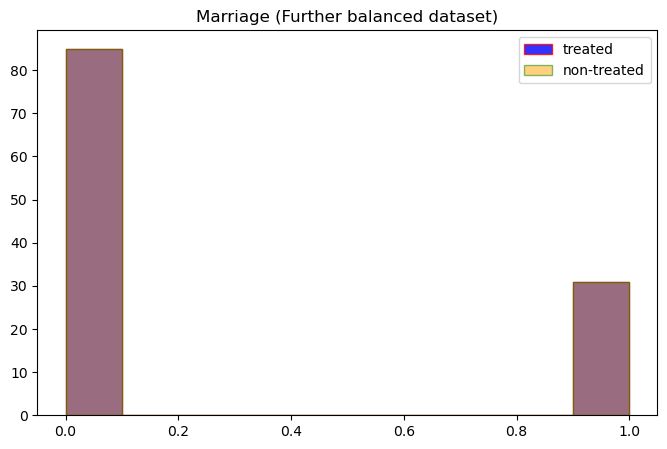

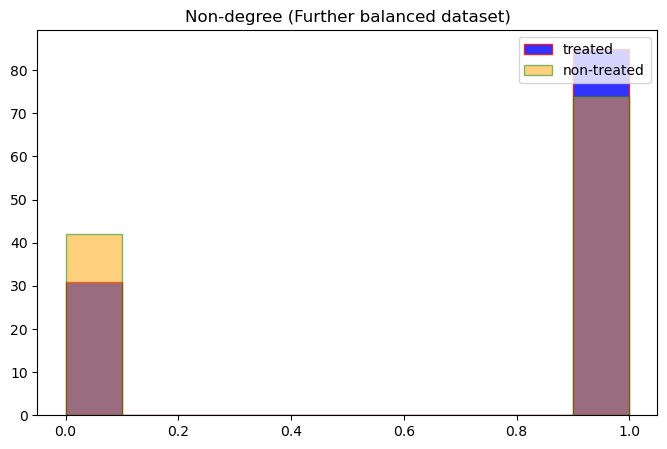

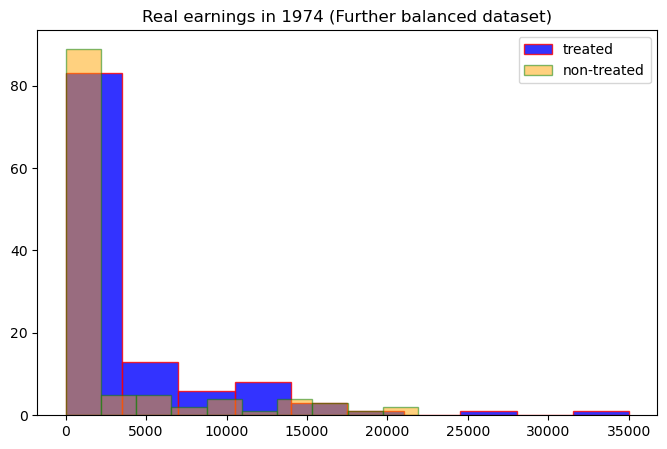

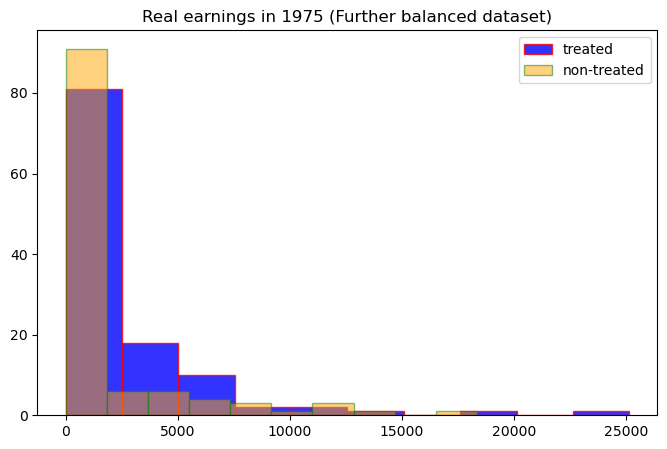

In [146]:
new_ID_treated = [pair[0] for pair in NEWgraph_after_matching]
new_ID_nontreated = [pair[1] for pair in NEWgraph_after_matching]
new_ID = new_ID_treated + new_ID_nontreated # ids which should be selected from the dataframe
# creating the new dataframe
new_lalonde_data = lalonde_data.loc[lalonde_data['id'].isin(new_ID)]
new_lalonde_data = new_lalonde_data.reset_index()
new_lalonde_data.head(5)

NEWtreat = new_lalonde_data['treat']

NEWage = new_lalonde_data['age']
NEWeduc = new_lalonde_data['educ']
NEWblack = new_lalonde_data['black']
NEWhispan = new_lalonde_data['hispan']
NEWmarried = new_lalonde_data['married']
NEWnodegree = new_lalonde_data['nodegree']
NEWre74 = new_lalonde_data['re74']
NEWre75 = new_lalonde_data['re75']
# seperating the groups
NEWage_treated = NEWage[new_lalonde_data['treat']==1]
NEWage_nontreated = NEWage[new_lalonde_data['treat']==0]

NEWeduc_treated = NEWeduc[new_lalonde_data['treat']==1]
NEWeduc_nontreated = NEWeduc[new_lalonde_data['treat']==0]

NEWblack_treated = NEWblack[new_lalonde_data['treat']==1]
NEWblack_nontreated = NEWblack[new_lalonde_data['treat']==0]

NEWhispan_treated = NEWhispan[new_lalonde_data['treat']==1]
NEWhispan_nontreated = NEWhispan[new_lalonde_data['treat']==0]

NEWmarried_treated = NEWmarried[new_lalonde_data['treat']==1]
NEWmarried_nontreated = NEWmarried[new_lalonde_data['treat']==0]

NEWnodegree_treated = NEWnodegree[new_lalonde_data['treat']==1]
NEWnodegree_nontreated = NEWnodegree[new_lalonde_data['treat']==0]

NEWre74_treated = NEWre74[new_lalonde_data['treat']==1]
NEWre74_nontreated = NEWre74[new_lalonde_data['treat']==0]

NEWre75_treated = NEWre75[new_lalonde_data['treat']==1]
NEWre75_nontreated = NEWre75[new_lalonde_data['treat']==0]

# plotting histograms for age feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWage_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWage_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Age (Further balanced dataset)')
plt.show()

# plotting histograms for education feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWeduc_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWeduc_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Years of Education (Further balanced dataset)')
plt.show()

# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWblack_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWblack_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Black race (Further balanced dataset)')
plt.show()


# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWhispan_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWhispan_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Whispan race (Further balanced dataset)')
plt.show()

# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWmarried_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWmarried_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Marriage (Further balanced dataset)')
plt.show()

# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWnodegree_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWnodegree_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Non-degree (Further balanced dataset)')
plt.show()

# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWre74_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWre74_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Real earnings in 1974 (Further balanced dataset)')
plt.show()

# plotting histograms for black race feature
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWre75_treated, alpha=0.8, edgecolor='red', color='blue')
ax.hist(NEWre75_nontreated, alpha=0.5, edgecolor='green', color='orange')
ax.legend(['treated', 'non-treated'],loc='upper right')
ax.set_title('Real earnings in 1975 (Further balanced dataset)')
plt.show()

Now, we see that all features have similar distributions among treated and non-treated groups.

### 1-6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


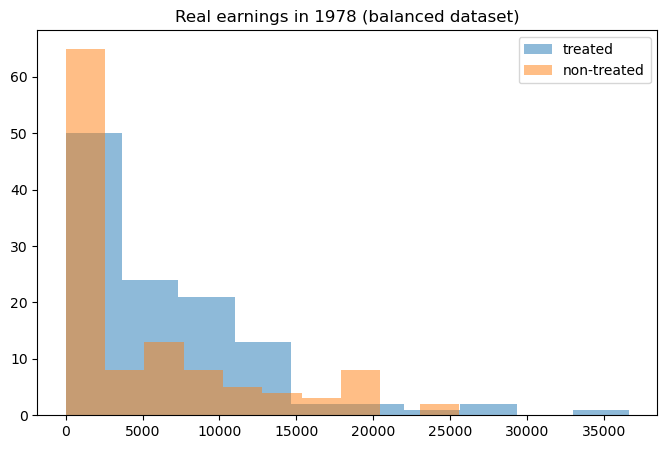

In [145]:
NEWre78 = new_lalonde_data['re78']
# seperating the two groups
NEWre78_treated = NEWre78[new_lalonde_data.treat==1]
NEWre78_nontreated = NEWre78[new_lalonde_data.treat==0]
# plotting histograms for re78
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.hist(NEWre78_treated, alpha=0.5)
ax.hist(NEWre78_nontreated, alpha=0.5)
plt.legend(['treated', 'non-treated'],loc='upper right')
plt.title('Real earnings in 1978 (balanced dataset)')
plt.show()

**Final conclusion:** From the above figure, wee see that the treated group have more income compared to the non-treated group which shows the perfect efficiencty of the training program. As all features have similar distributions in this case, our conclusion is valid.

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project!

2-1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency (as you will see later in the course), is of great help when it comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# loading the data
newsgroup_data = fetch_20newsgroups(subset='all')

In [3]:
data = newsgroup_data.data
target = newsgroup_data.target
filenames = newsgroup_data.filenames
target_names = newsgroup_data.target_names

In [4]:
# converting data to vectors
vectorizer = TfidfVectorizer()
data_vectorized = vectorizer.fit_transform(data)
data_vectorized.shape

(18846, 173762)

In [32]:
# splitting data to train, validation and test sets
data_train, data_test, label_train, label_test = train_test_split(data_vectorized, target, test_size=0.2, random_state=42)
data_validation, data_test, label_validation, label_test = train_test_split(data_test, label_test, test_size=0.1, random_state=42)
print('Shape of train data: ', data_train.shape)
print('Shape of validation data: ', data_validation.shape)
print('Shape of test data: ', data_test.shape)

Shape of train data:  (15076, 173762)
Shape of validation data:  (3393, 173762)
Shape of test data:  (377, 173762)


2-2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.


In [33]:
# training random forest on training set
clf = RandomForestClassifier(n_estimators=100, max_depth=20)
clf.fit(data_train, label_train)
train_acc = clf.score(data_train, label_train)
print('Accuracy of the model on train set: ', train_acc)

Accuracy of the model on train set:  0.8843857787211462


In [34]:
val_acc = clf.score(data_validation, label_validation)
print('Accuracy of the model on validation set: ', val_acc)

Accuracy of the model on validation set:  0.7565576186265841


In [35]:
val_acc = clf.score(data_test, label_test)
print('Accuracy of the model on tes set: ', val_acc)

Accuracy of the model on tes set:  0.8010610079575596


In [36]:
# Hyperparameter tunning using greed search
grid_param = {"n_estimators":  [50, 80, 100, 300],
             "max_depth": [60, 80, 100, 200]}

grid_search = GridSearchCV(estimator = clf, param_grid = grid_param, return_train_score=True,
                          cv = 3, n_jobs = -1, verbose = 2)

# fitting the result of grid search on validation data
grid_search.fit(data_validation, label_validation)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=20), n_jobs=-1,
             param_grid={'max_depth': [60, 80, 100, 200],
                         'n_estimators': [50, 80, 100, 300]},
             return_train_score=True, verbose=2)

[CV] END ......................max_depth=60, n_estimators=80; total time=   4.4s
[CV] END ......................max_depth=80, n_estimators=50; total time=   3.7s
[CV] END ......................max_depth=80, n_estimators=80; total time=   5.5s
[CV] END .....................max_depth=80, n_estimators=300; total time=  21.5s
[CV] END .....................max_depth=200, n_estimators=50; total time=   5.6s
[CV] END ....................max_depth=200, n_estimators=100; total time=  10.8s
[CV] END .....................max_depth=60, n_estimators=100; total time=   5.6s
[CV] END ......................max_depth=80, n_estimators=50; total time=   3.7s
[CV] END .....................max_depth=80, n_estimators=100; total time=   6.8s
[CV] END .....................max_depth=100, n_estimators=50; total time=   4.2s
[CV] END .....................max_depth=100, n_estimators=80; total time=   6.6s
[CV] END ....................max_depth=100, n_estimators=300; total time=  27.1s
[CV] END ...................

In [40]:
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'max_depth': 80, 'n_estimators': 300}


Acuuracy of the best model on test data:  0.8222811671087533


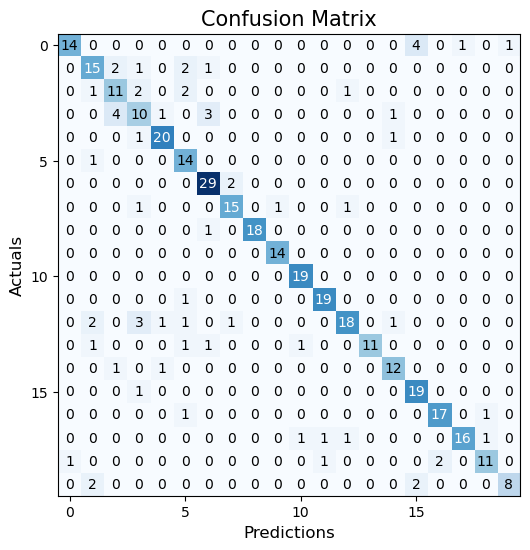

In [67]:
# evaluating performance of the model on test data
best_model = grid_search.best_estimator_
# predicting labels of the test data
test_labels_predicted = best_model.predict(data_test)
# calculating accuracy
temp = test_labels_predicted==label_test
best_model_test_acc = ( np.count_nonzero(temp==True) )/label_test.shape[0]
print("Acuuracy of the best model on test data: ", best_model_test_acc)
# printing confusion matrix
conf_mat = confusion_matrix(label_test, test_labels_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

As we can see acuuracy on the test data improved by around 2%.

In [78]:
feature_importances = best_model.feature_importances_

In [81]:
print('minumim feature importance: ', feature_importances.max())
print('maximum feature importance: ',feature_importances.min())
print('variance of feature importances: ',feature_importances.var())

minumim feature importance:  0.003787184432671132
maximum feature importance:  0.0
variance of feature importances:  2.903651715562373e-09


From the above results, we can conclude that the importance of features are almost equal and that there is no feature with significant importance compared with other features. 

## Question 3: CAT or PERSON; Data Sources and Introduction to Pytorch
The purpose of this exercise is two-fold. First, you create an image dataset inheriting from `torch.utils.data.Dataset` by collecting images from two webpages providing AI-generated images to the public. This helps you to understand how data needed for a data science task might come from various sources other than locally stored images, structured files (like CSV), relational databases, etc. Also, people sometimes need to create their custom dataset for their research purposes. In the second part, you will train a neural network on the data using the pytorch framework.

<img src="./twoGoodFriends.jpg" width="400" height="272">


### 3-1. Installing Pytorch

Your job for this section is to install pytorch and the torchvision library. You may normally need torchvision in this exercise when handling images for converting images to torch tensors. For the sake of practicing, it might be good to try installing the libraries directly from your notebook. However, you can also do it from your system shell. Whatever you do, please share your work and the installation success message below. If executing shell commands for installation please share the screenshot of your terminal.

Following images show the installation process of pytorch and torchvision respectively. The installations were done through the terminal.

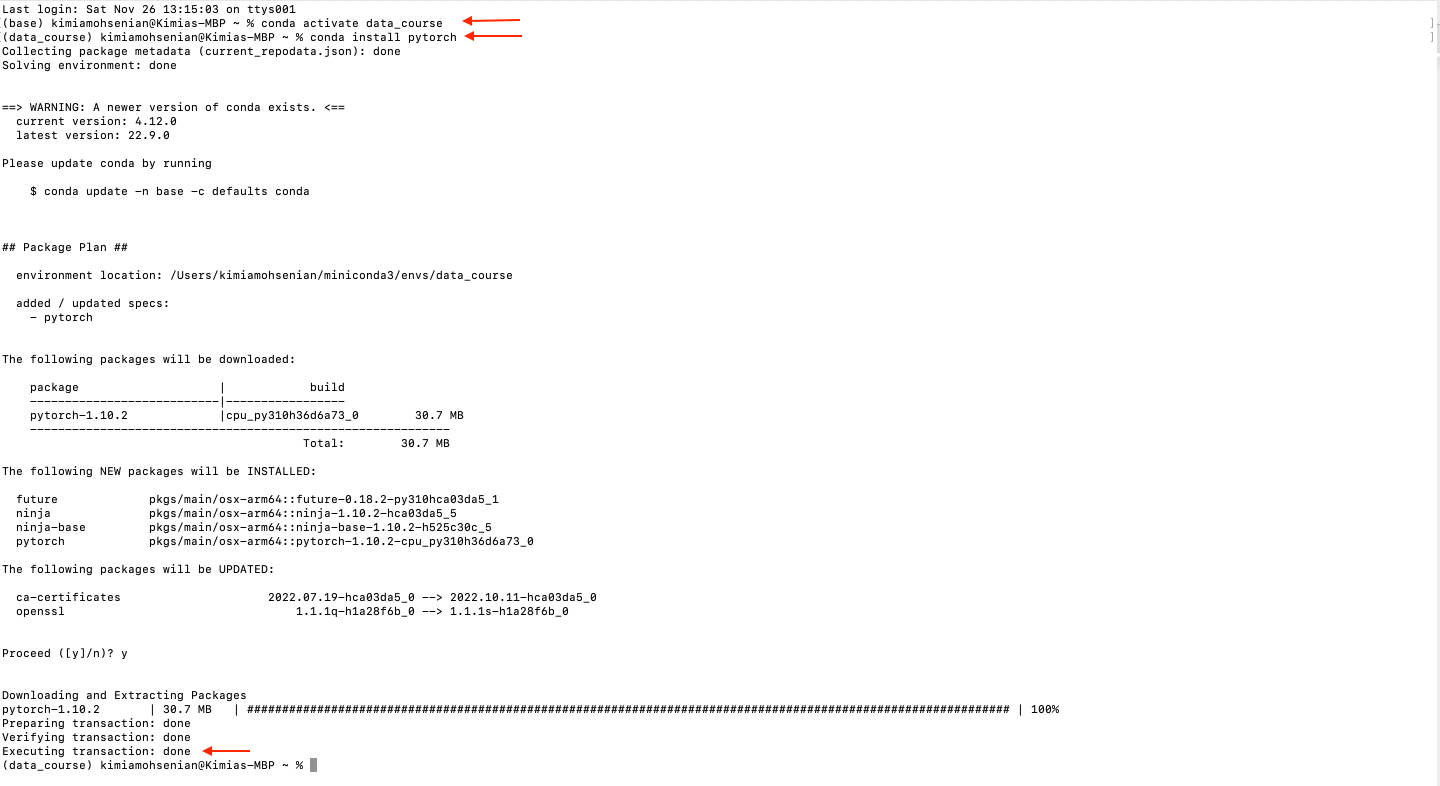

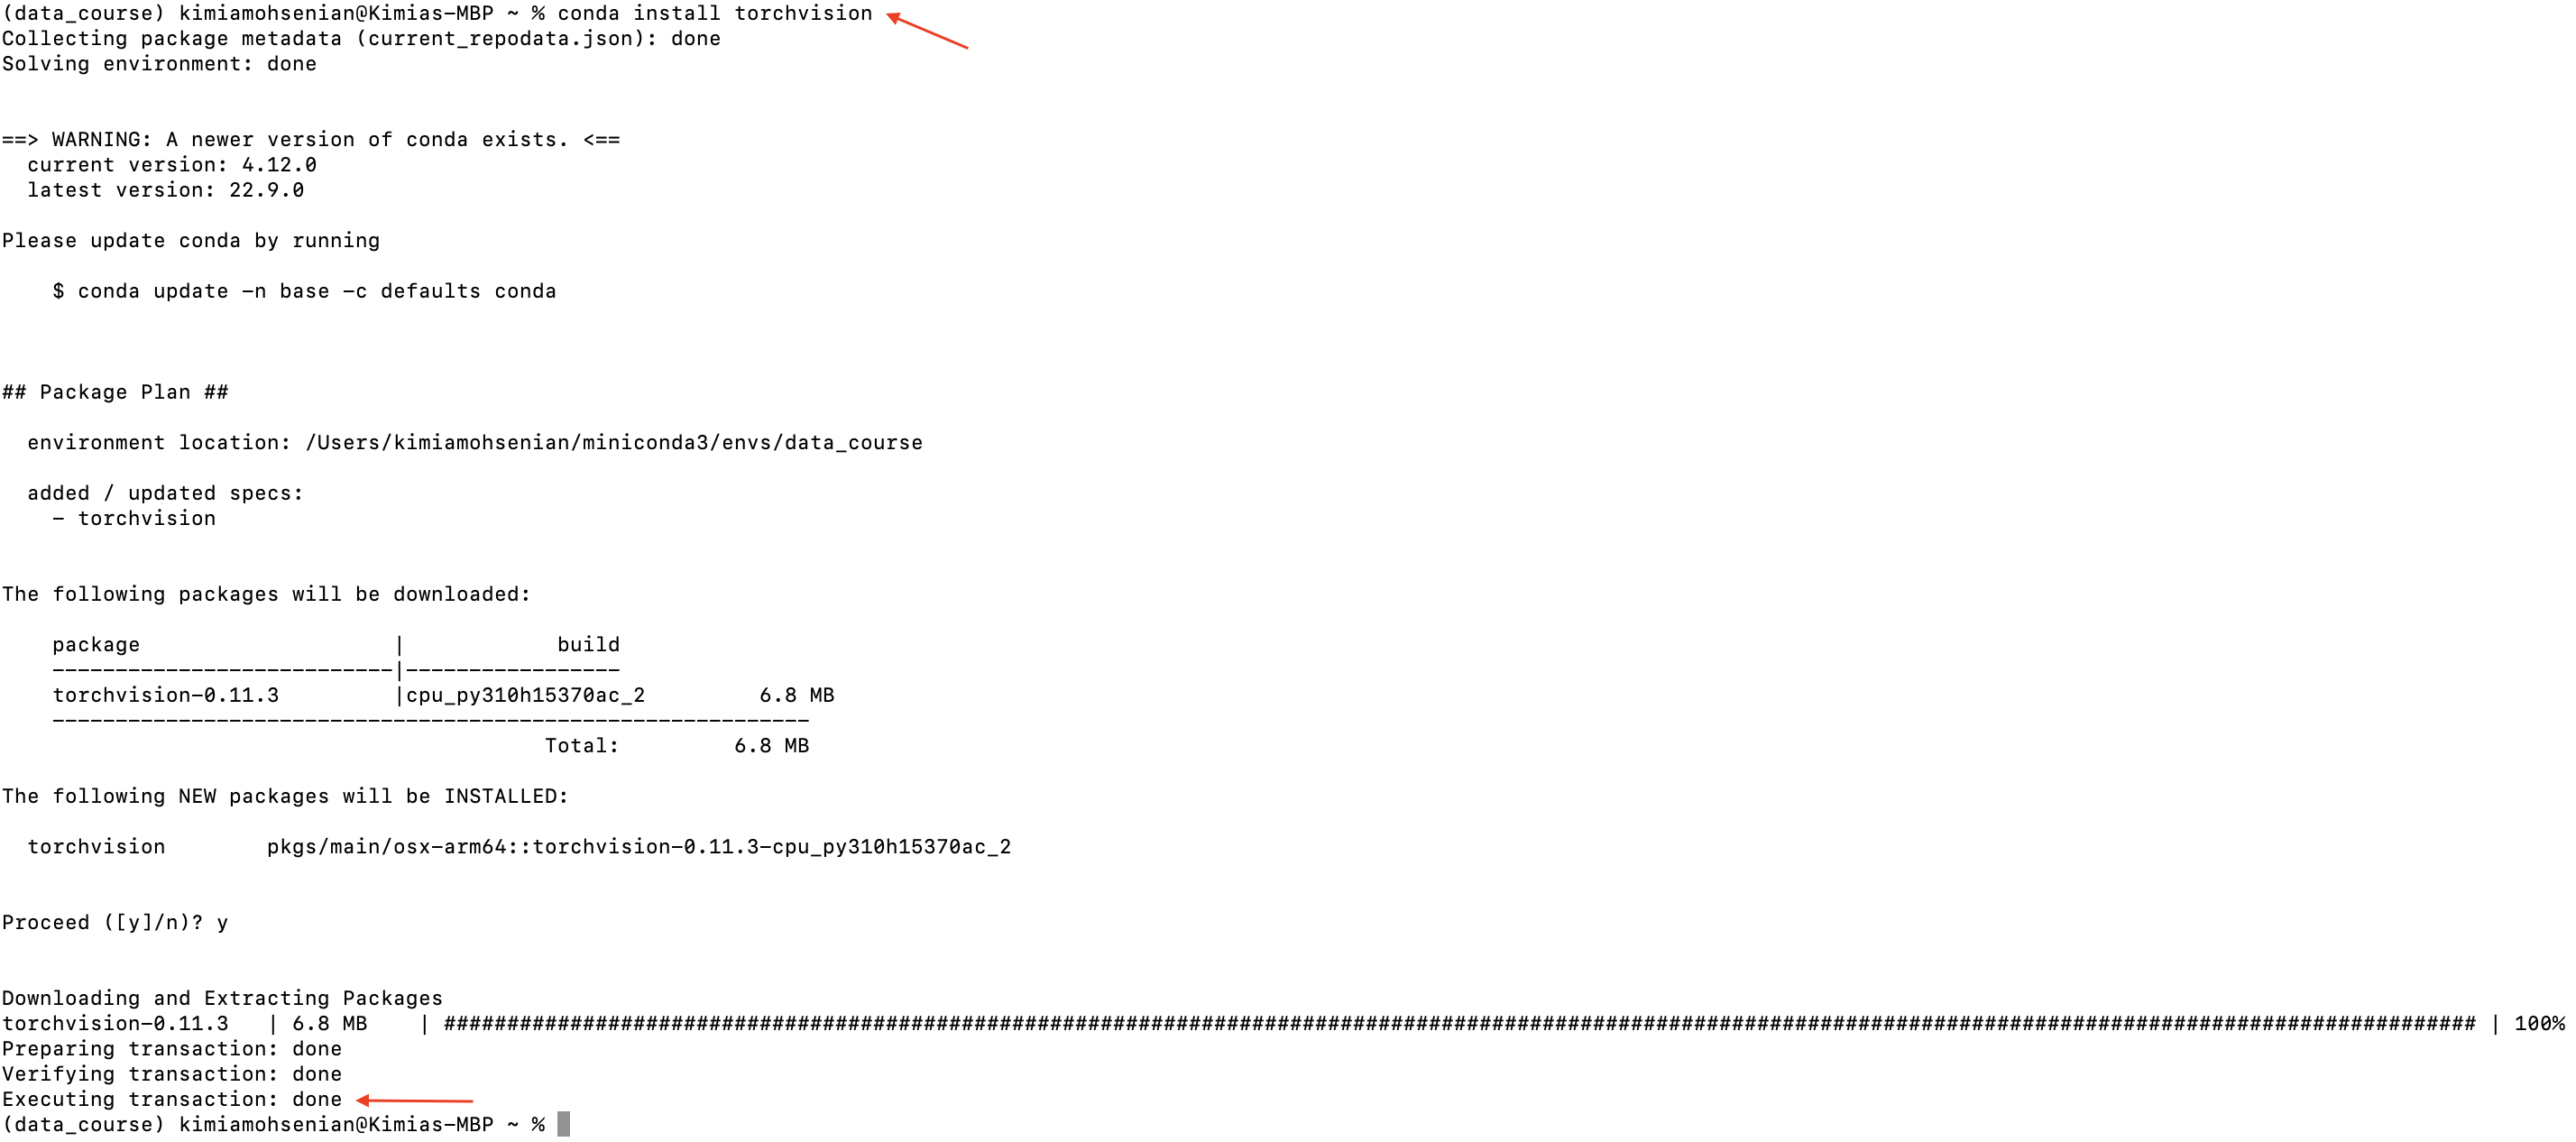

### 3-2. Dataset
Take a look at [this interesting webpage](https://thisxdoesnotexist.com/) which shares AI-generated images and have some fun first! Well, we want to collect a dataset consisting of 50 images from [this url](https://thispersondoesnotexist.com/image) created by Phillip Wang and 50 images from [this one](https://thiscatdoesnotexist.com) created by Ryan Hoover. 
For creating the dataset you must inherit from `torch.utils.data.Dataset` and name your custom dataset class as `collected_2class_Dataset`

The `__init__()`, `__len__()` and `__getitem__()` methods of the class must be rewritten by you properly. 

The dataset must be designed in a way that by instantiation of the class, the data collection starts until all the samples are gathered. Your `__getitem__()` should also be coded in a way that `__getitem__(idx)` returns the data sample with the index `idx`. More precisely if your instance of `collected_2class_Dataset` is named `DS` and if:

`img, label = DS.__getitem__(someIndex)`, Then:

* `img` should be a torch tensor of size [1, 784] with data type float. The values must represent the scaled (to [0,1]) pixel values of the grayscale version of the images after being resized to 28x28.  
* `label` should be a torch tensor of a single element with data type long taking the value of 0 if the image is for a person and 1 if the image is related to a cat.

You might need to use additional packages like [Pillow](https://pypi.org/project/Pillow/) for image operations. Also, for requesting images from the websites you can follow different approaches. The simplest one might be running proper curl commands as shell commands from inside your python code. Use the following URLs for each resource to GET the images:
* https://thispersondoesnotexist.com/image
* https://thiscatdoesnotexist.com

Write code for your Dataset class definition and also any auxiliary functions if applicable. Please instantiate your class at the end of this code section.

In [7]:
from PIL import Image, ImageOps
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
from torch.utils.data import Dataset, DataLoader
import logging
import http.client
import torch.nn as nn

In [49]:
class collected_2class_Dataset(torch.utils.data.Dataset):
    
    def __init__(self):
        self.url_person = 'https://thispersondoesnotexist.com/image'
        self.url_cat = 'https://thiscatdoesnotexist.com/'

        # getting images from the urls
        self.images = []
        self.labels = []
    
    
        print('[INFO] Data collection started...')
        session = requests.Session()
        for i in range(50):
            
            response = session.get(self.url_person)
            img_person = Image.open(BytesIO(response.content))
            self.images.append(img_person)
            self.labels.append(0)
            print('[INFO] image of person ', i, 'is read')

            response = session.get(self.url_cat)
            img_cat = Image.open(BytesIO(response.content))
            self.images.append(img_cat)
            self.labels.append(1)
            print('[INFO] image of cat ', i, 'is read')
            
        print('[INFO] Data collection finished.')
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        
        img = self.images[index]
        # converting image to grayscale
        gray_image = ImageOps.grayscale(img)
        # resizing the image
        gray_image_resized = gray_image.resize([28, 28])
        # rescaling the image (normalizing)
        gray_image_resized = np.asarray(gray_image_resized)
        gray_image_resized_normalized = gray_image_resized/255.0
        # converting the PIL image to a float type tensor
        img_to_tensor = torch.tensor(gray_image_resized_normalized, dtype=torch.float32)
        # final resizing
        img_to_tensor = img_to_tensor.view(1, 784)
        
        label = self.labels[index]
        # converting the label to torch tensor of size 1 and type long
        label_to_tensor = torch.tensor([label], dtype=torch.long)
        
        return img_to_tensor, label_to_tensor 

In [54]:
DS = collected_2class_Dataset()

[INFO] Data collection started...
[INFO] image of person  0 is read
[INFO] image of cat  0 is read
[INFO] image of person  1 is read
[INFO] image of cat  1 is read
[INFO] image of person  2 is read
[INFO] image of cat  2 is read
[INFO] image of person  3 is read
[INFO] image of cat  3 is read
[INFO] image of person  4 is read
[INFO] image of cat  4 is read
[INFO] image of person  5 is read
[INFO] image of cat  5 is read
[INFO] image of person  6 is read
[INFO] image of cat  6 is read
[INFO] image of person  7 is read
[INFO] image of cat  7 is read
[INFO] image of person  8 is read
[INFO] image of cat  8 is read
[INFO] image of person  9 is read
[INFO] image of cat  9 is read
[INFO] image of person  10 is read
[INFO] image of cat  10 is read
[INFO] image of person  11 is read
[INFO] image of cat  11 is read
[INFO] image of person  12 is read
[INFO] image of cat  12 is read
[INFO] image of person  13 is read
[INFO] image of cat  13 is read
[INFO] image of person  14 is read
[INFO] image 

### 3-3. Dataloader
Using `torch.utils.data.random_split` split your dataset to train/test with the proportion of 70/30. Based on `torch.utils.data.DataLoader` create a DataLoader for train data and one for test data. The choice of the batch size is up to you, but try to use rational values.

In [278]:
# train test split
train_size = int(0.7*len(DS))
test_size = int(0.3*len(DS))
train_data, test_data = torch.utils.data.random_split(DS, [train_size, test_size])

In [368]:
n_batch = 10
train_loader = DataLoader(train_data, batch_size=n_batch, shuffle=True)
test_loader = DataLoader(test_data, batch_size=n_batch, shuffle=True)

### 3-4. Training a NN Classifier
Inheriting from `torch.nn.Module` create a neural network for classifying the input images to person/cat. Use 2 hidden layers. Employ relu as the non-linearity (activation function) for the both hidden layers and sigmoid for the output. The choice of the number of nodes in the hidden layers is up to you. Train your network with the `torch.nn.CrossEntropyLoss` loss as objective function and use `torch.optim.Adam` as optimizer. Use 10 epochs of learning. Report the accuracy of classification at the end of each learning epoch by printing the values. 

In [398]:
n_features = 784    #input dimension (number of features)
n_hidden1 = 400      #number of nodes in the first hidden layer
n_hidden2 = 100      #number of nodes in the second hidden layer
n_classes = 2       #number of classes
n_epochs = 10       #number of epochs

In [400]:
class NNModel(nn.Module):
    def __init__(self):
        super(NNModel, self).__init__()
        self.linear1 = nn.Linear(n_features, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, n_classes)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        return x  

In [401]:
classifier = NNModel()

In [409]:
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.00000000001)

In [434]:
# training
for epoch in range(n_epochs):
    epoch_loss = 0
    correct_preds = 0
    total_preds = 0
    epoch_acc = 0
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        # set optimizer to zero grad
        optimizer.zero_grad()
        # forward propagation
        outputs = classifier(images)
        #print(pred_labels)
        loss = loss_func(outputs.view(outputs.shape[0], n_classes), labels.view(labels.shape[0]))
        # backward propagation
        loss.backward()
        # optimize
        optimizer.step()
        epoch_loss += loss.item()
        # calculating accuracy
        __, predicted_labels = torch.max(outputs.data.view(outputs.shape[0], 2), 1)
        correct_preds += (predicted_labels == labels.view(labels.shape[0])).sum().item() 
        total_preds += labels.shape[0]
        epoch_acc += (correct_preds/total_preds)*100
    # display epoch results
    epoch_loss = epoch_loss/(train_size/n_batch)
    epoch_acc = epoch_acc/(train_size/n_batch)
    
    print('[INFO] Epoch:', epoch+1, '  Loss: ', round(epoch_loss, 9), '    Accuracy: ', round(epoch_acc, 3))
    

[INFO] Epoch: 1   Loss:  0.445600373     Accuracy:  89.82
[INFO] Epoch: 2   Loss:  0.445600369     Accuracy:  86.963
[INFO] Epoch: 3   Loss:  0.445600361     Accuracy:  91.653
[INFO] Epoch: 4   Loss:  0.445600365     Accuracy:  87.082
[INFO] Epoch: 5   Loss:  0.445600373     Accuracy:  87.201
[INFO] Epoch: 6   Loss:  0.445600378     Accuracy:  86.653
[INFO] Epoch: 7   Loss:  0.445600365     Accuracy:  85.129
[INFO] Epoch: 8   Loss:  0.445600386     Accuracy:  89.201
[INFO] Epoch: 9   Loss:  0.445600369     Accuracy:  85.415
[INFO] Epoch: 10   Loss:  0.445600399     Accuracy:  91.582


In [435]:
# saving the model
ModelPATH = './classifier.pth'
torch.save(classifier.state_dict(), ModelPATH)

### 3-5. Testing the Trained Model
Examine the accuracy of your trained model on the test data prepared in section 3-5 and report the result.

In [436]:
classifier = NNModel()
classifier.load_state_dict(torch.load(ModelPATH))

<All keys matched successfully>

In [437]:
correct_preds = 0
total_preds = 0
# no need to calculate gradients during inference
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        print('labels: ', labels.view(n_batch))
        # calculate output by running through the network
        outputs = classifier(images)
        # get the predictions
        __, predicted_labels = torch.max(outputs.data.view(outputs.shape[0], n_classes), 1)
        print('predicted_labels', predicted_labels)
        print('----------------------------------------------------------')
        # update results
        total_preds += labels.size(0)
        correct_preds += (predicted_labels == labels.view(labels.shape[0])).sum().item()
    acc = (correct_preds/total_preds)*100
    print('Accuracy of the classifier on the test data: ', -acc, '%')

labels:  tensor([0, 1, 1, 0, 0, 1, 0, 1, 0, 1])
predicted_labels tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
----------------------------------------------------------
labels:  tensor([0, 0, 1, 1, 0, 0, 0, 1, 1, 1])
predicted_labels tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])
----------------------------------------------------------
labels:  tensor([1, 0, 1, 0, 1, 0, 1, 0, 0, 1])
predicted_labels tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])
----------------------------------------------------------
Accuracy of the classifier on the test data:  70.0 %


### 3-6. Is it Really Difficult to Distinguish Cats from Humans? 
Can you propose a rather simple rule-based system for doing this classification task? No code is needed for this part, just explain your ideas.

In [ ]:
# Your code for section 3.6